In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from human_ai_robustness.agent import ToMModel, GreedyHumanModel_pk

In [3]:
import numpy as np
from human_aware_rl.ppo.ppo_pop import make_tom_agent, get_eval_bc_agents
from overcooked_ai_py.agents.benchmarking import AgentEvaluator
from overcooked_ai_py.agents.agent import AgentPair, GreedyHumanModel
from human_ai_robustness.import_person_params import import_manual_tom_params

layout = "cramped_room"
ae = AgentEvaluator(mdp_params={"layout_name": layout, "start_order_list": ["any"] * 100}, env_params={"horizon": 400})

In [4]:
# _, TRAIN_TOM_PARAMS, _ = import_manual_tom_params(layout, 1)

In [5]:

# tom_pop = []
# for this_tom_params in TRAIN_TOM_PARAMS + TRAIN_TOM_PARAMS:
#     tom_agent = make_tom_agent(ae.mlp)
#     tom_agent.set_tom_params(None, None, [this_tom_params], tom_params_choice=0)
#     tom_pop.append(tom_agent)
    
# tom0 = tom_pop[0]
# tom1 = tom_pop[1]
# _ = ae.evaluate_agent_pair(AgentPair(tom0, tom1), num_games=10, display=False)

In [6]:
# tom_agent = make_tom_agent(ae.mlp)

In [7]:
# variances_dict = {
    
# }
# tom_agent.__dict__

In [8]:
# std, low, high, integer
no_mutation_params = {
    "compliance": (0, 0, 1, False),
    "retain_goals": (0, 0, 1, False),
    "prob_thinking_not_moving": (0, 0, 1, False),
    "path_teamwork": (0, 0, 1, False),
    "rationality_coefficient": (0, 0, 1000, False),
    "prob_pausing": (0, 0, 1, False),
    "prob_greedy": (0, 0, 1, False),
    "prob_obs_other": (0, 0, 1, False),
    "look_ahead_steps": (0, 0, 10, True)
}

In [9]:
TOM_OPT_PARAMS_BY_LAYOUT = {
    "coordination_ring": { 
        "compliance":0.2,
        "teamwork":1,
        "retain_goals":0.8,
        "path_teamwork":1,
        "rationality_coefficient":20,
        "prob_greedy": 0.3,
        "prob_obs_other": 1,
        "look_ahead_steps":4,
        "prob_thinking_not_moving":0, "prob_pausing":0, "use_OLD_ml_action":True, "wrong_decisions":0,
    },
    "counter_circuit": { 
        "compliance":0.1,
        "teamwork":1,
        "retain_goals":0.9,
        "path_teamwork":1,
        "rationality_coefficient":20,
        "prob_greedy": 0.3,
        "prob_obs_other": 1,
        "look_ahead_steps":4,
        "prob_thinking_not_moving":0, "prob_pausing":0, "use_OLD_ml_action":True, "wrong_decisions":0,
    }   
}


In [10]:
import time
def get_opt_tom(ae, layout):
    return ToMModel(ae.mlp, **TOM_OPT_PARAMS_BY_LAYOUT[layout])

def tom_eval_suite(ae, tom0, tom1, opt, n, bc_and_opt=True):
    ghm = GreedyHumanModel_pk(ae.mlp)
    
    rews = {}
    
    print("TOM+TOM")
    time.sleep(0.2)
    avg_rew = np.mean(ae.evaluate_agent_pair(AgentPair(tom0, tom1), num_games=n, display=False)['ep_returns'])
    rews["TOM+TOM"] = avg_rew
    tom = tom0
    
    print("GMH+TOM")
    time.sleep(0.2)
    avg_rew = np.mean(ae.evaluate_agent_pair(AgentPair(ghm, tom), num_games=n, display=False)['ep_returns'])
    rews["GMH+TOM"] = avg_rew
    print("TOM+GHM")
    time.sleep(0.2)
    avg_rew = np.mean(ae.evaluate_agent_pair(AgentPair(tom, ghm), num_games=n, display=False)['ep_returns'])
    rews["TOM+GHM"] = avg_rew
    
    if bc_and_opt:
        print("OPT+TOM")
        time.sleep(0.2)
        avg_rew = np.mean(ae.evaluate_agent_pair(AgentPair(opt, tom), num_games=n, display=False)['ep_returns'])
        rews["OPT+TOM"] = avg_rew
        print("TOM+OPT")
        time.sleep(0.2)
        avg_rew = np.mean(ae.evaluate_agent_pair(AgentPair(tom, opt), num_games=n, display=False)['ep_returns'])
        rews["TOM+OPT"] = avg_rew

        bc, _ = get_eval_bc_agents({"mdp_params": {"layout_name": layout}})

        print("BC+TOM")
        time.sleep(0.2)
        avg_rew = np.mean(ae.evaluate_agent_pair(AgentPair(bc, tom), num_games=n, display=False)['ep_returns'])
        rews["BC+TOM"] = avg_rew
        print("TOM+BC")
        time.sleep(0.2)
        avg_rew = np.mean(ae.evaluate_agent_pair(AgentPair(tom, bc), num_games=n, display=False)['ep_returns'])
        rews["TOM+BC"] = avg_rew
    
    return rews



 coordination_ring 

{'compliance': 0.1, 'retain_goals': 0.8, 'prob_thinking_not_moving': 0.0, 'path_teamwork': 0.1, 'rationality_coefficient': 2.0, 'prob_pausing': 0.5, 'prob_greedy': 0.0, 'prob_obs_other': 0.0, 'look_ahead_steps': 4}
Loaded MediumLevelPlanner from /Users/micah/Developer/Research/CHAI/human_ai_robustness/human_ai_coord/overcooked_ai/overcooked_ai_py/data/planners/coordination_ring_am.pkl
TOM+TOM


100%|██████████| 40/40 [00:09<00:00,  4.19it/s]

Avg reward 67.50 (std: 17.71, se: 2.80) over 40 games of avg length 400.0


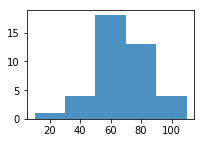

KeyboardInterrupt: 

In [11]:
layouts = ["coordination_ring", "counter_circuit"]
for layout in layouts:
    print("\n\n", layout, "\n")
    time.sleep(0.2)
    ae = AgentEvaluator(mdp_params={"layout_name": layout, "start_order_list": ["any"] * 100}, env_params={"horizon": 400})
    _, TRAIN_TOM_PARAMS, _ = import_manual_tom_params(layout, 1)
    base_tom_model_for_layout_params = TRAIN_TOM_PARAMS[0]
    base_tom_model_for_layout_params = ToMModel.mutate_tom_params(
        base_tom_model_for_layout_params,
        no_mutation_params
    )
    
    print(base_tom_model_for_layout_params)
    tom0 = ToMModel.from_tom_params(ae.mlp, base_tom_model_for_layout_params)
    tom1 = ToMModel.from_tom_params(ae.mlp, base_tom_model_for_layout_params)
    opt = get_opt_tom(ae, layout)
    
    tom_eval_suite(ae, tom0, tom1, opt, n=40)
    
#     ae.evaluate_agent_pair(AgentPair(tom0, tom1), num_games=40, display=False)

In [19]:
manual_tom_parameterization = {
    # hyperparam tuning history
    
    # {'TOM+TOM': 68.5, 'GMH+TOM': 50.5, 'TOM+GHM': 53.0, 'OPT+TOM': 103.5, 'TOM+OPT': 106.0} 0.1 compliance
    # {'TOM+TOM': 69.0, 'GMH+TOM': 67.0, 'TOM+GHM': 54.5, 'OPT+TOM': 90.0, 'TOM+OPT': 111.0} 0.1 -> 0.3 compliance
    # {'TOM+TOM': 70.5, 'GMH+TOM': 70.0, 'TOM+GHM': 65.0, 'OPT+TOM': 93.5, 'TOM+OPT': 127.0} 0.3->0.6 compliance
    # {'TOM+TOM': 67.0, 'GMH+TOM': 69.0, 'TOM+GHM': 74.0, 'OPT+TOM': 104.0, 'TOM+OPT': 118.0} 2 -> 1.5 rat X
    # {'TOM+TOM': 66.5, 'GMH+TOM': 75.0, 'TOM+GHM': 67.5, 'OPT+TOM': 87.5, 'TOM+OPT': 126.0} 0.0 -> 0.3 prob obs other X
    # {'TOM+TOM': 83.0, 'GMH+TOM': 78.5, 'TOM+GHM': 60.0, 'OPT+TOM': 105.0, 'TOM+OPT': 126.0} path_teamwork 0.1 -> 0.8
    # ret goals 8->9 obs_other 0->3 X
    # obs_other 0->8 X
    # path teamwork 0.8->1 X
    # compliance 0.6 -> 0.8 X
    # {'TOM+TOM': 77.4, 'GMH+TOM': 82.0, 'TOM+GHM': 64.8, 'OPT+TOM': 98.8, 'TOM+OPT': 132.2}
    # compliance 0.6 -> 0.8 
    # {'TOM+TOM': 80.4, 'GMH+TOM': 84.0, 'TOM+GHM': 65.6, 'OPT+TOM': 99.2, 'TOM+OPT': 124.4}
    # obs_other 0->8 X
    # {'TOM+TOM': 79.6, 'GMH+TOM': 77.6, 'TOM+GHM': 70.8, 'OPT+TOM': 105.4, 'TOM+OPT': 131.4, 'BC+TOM': 83.4, 'TOM+BC': 70.8}
    
    "coordination_ring": {
        'compliance': 0.8, 
        'retain_goals': 0.8, 
        'prob_thinking_not_moving': 0.0, 
        'path_teamwork': 0.8, 
        'rationality_coefficient': 2, #
        'prob_pausing': 0.5, 
        'prob_greedy': 0.0, 
        'prob_obs_other': 0.0,#.8, 
        'look_ahead_steps': 4
    },
    
    # copied from above as starting point
    # {'TOM+TOM': 53.0, 'GMH+TOM': 71.4, 'TOM+GHM': 79.4, 'OPT+TOM': 103.8, 'TOM+OPT': 94.2, 'BC+TOM': 42.6, 'TOM+BC': 42.4}
    # compliance 0.8 -> 0.3 X
    # retain_goals 0.8 -> 0.9 X
    # look ahead 4 -> 2
    "counter_circuit": {
        'compliance': 0.8, 
        'retain_goals': 0.8, 
        'prob_thinking_not_moving': 0.0, 
        'path_teamwork': 0.8, 
        'rationality_coefficient': 2.0, 
        'prob_pausing': 0.5, 
        'prob_greedy': 0.0, 
        'prob_obs_other': 0.0, 
        'look_ahead_steps': 2
    }
}



 counter_circuit 

Loaded MediumLevelPlanner from /Users/micah/Developer/Research/CHAI/human_ai_robustness/human_ai_coord/overcooked_ai/overcooked_ai_py/data/planners/counter_circuit_am.pkl
TOM+TOM


100%|██████████| 100/100 [00:31<00:00,  3.20it/s]

Avg reward 51.60 (std: 25.48, se: 2.55) over 100 games of avg length 400.0


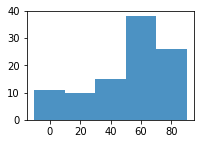

  0%|          | 0/100 [00:00<?, ?it/s]

GMH+TOM


100%|██████████| 100/100 [00:19<00:00,  5.14it/s]

Avg reward 78.40 (std: 14.05, se: 1.41) over 100 games of avg length 400.0


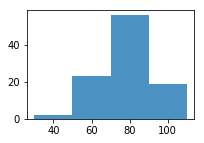

TOM+GHM


100%|██████████| 100/100 [00:18<00:00,  5.40it/s]


Avg reward 79.80 (std: 12.16, se: 1.22) over 100 games of avg length 400.0


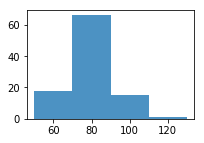

OPT+TOM


100%|██████████| 100/100 [00:37<00:00,  2.68it/s]

Avg reward 102.00 (std: 31.94, se: 3.19) over 100 games of avg length 400.0


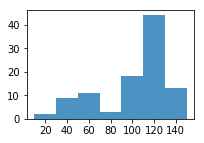

TOM+OPT


100%|██████████| 100/100 [00:37<00:00,  2.65it/s]

Avg reward 89.40 (std: 37.89, se: 3.79) over 100 games of avg length 400.0


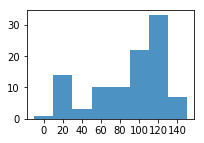

Loading a model without an environment, this model cannot be trained until it has a valid environment.
Loading a model without an environment, this model cannot be trained until it has a valid environment.
BC+TOM


100%|██████████| 100/100 [00:39<00:00,  2.55it/s]


Avg reward 40.40 (std: 21.16, se: 2.12) over 100 games of avg length 400.0


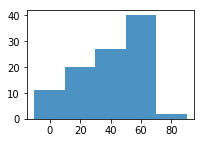

TOM+BC


100%|██████████| 100/100 [00:39<00:00,  2.55it/s]

Avg reward 47.60 (std: 18.28, se: 1.83) over 100 games of avg length 400.0


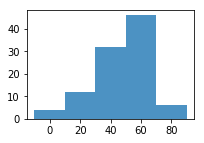

{'TOM+TOM': 51.6, 'GMH+TOM': 78.4, 'TOM+GHM': 79.8, 'OPT+TOM': 102.0, 'TOM+OPT': 89.4, 'BC+TOM': 40.4, 'TOM+BC': 47.6}


In [20]:
layouts = ["counter_circuit"]#, "counter_circuit"]
for layout in layouts:
    print("\n\n", layout, "\n")
    time.sleep(0.2)
    ae = AgentEvaluator(mdp_params={"layout_name": layout, "start_order_list": ["any"] * 100}, env_params={"horizon": 400})
    tom0 = ToMModel.from_tom_params(ae.mlp, manual_tom_parameterization[layout])
    tom1 = ToMModel.from_tom_params(ae.mlp, manual_tom_parameterization[layout])
    opt = get_opt_tom(ae, layout)
    
    print(tom_eval_suite(ae, tom0, tom1, opt, n=100))
#     ae.evaluate_agent_pair(AgentPair(tom0, tom1), num_games=40, display=False)